In [294]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## 문제1) 

In [295]:
x = 495
std = 10
alpha = 0.05
n = 25
target = 500

t_stat = (x - target) / (std / np.sqrt(n))
p_value = 2 * stats.t.cdf(t_stat, df=n-1)


In [296]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")
'''
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.
'''

t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


'\nt-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.\n'

## 문제2) 분포 시각화

<Figure size 500x500 with 0 Axes>

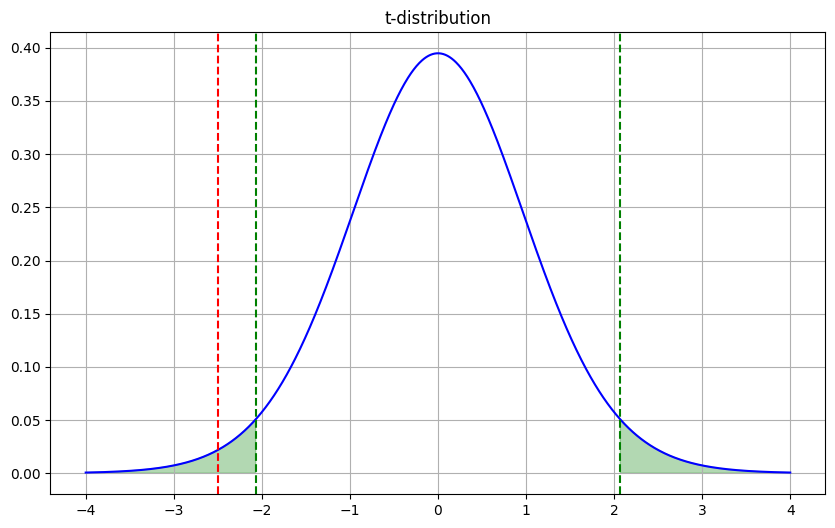

In [297]:
plt.figure(figsize = (5,5))

df = n - 1
t_critical = stats.t.ppf(1 - alpha/2, df)

# x축 범위
x_vals = np.linspace(-4, 4, 1000)
y_vals = stats.t.pdf(x_vals, df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue')

# t-값 (빨간 점선)
plt.axvline(t_stat, color='red', linestyle='--')

# 임계값 (초록 점선)
plt.axvline(t_critical, color='green', linestyle='--')
plt.axvline(-t_critical, color='green', linestyle='--')

# 기각역 영역 (초록 음영)
plt.fill_between(x_vals, y_vals, where=(x_vals <= -t_critical) | (x_vals >= t_critical),
                 color='green', alpha=0.3 )


# 제목과 축
plt.title('t-distribution')
plt.grid(True)
plt.show()


## 문제3) 단일 t표본 검정

In [298]:
from scipy.stats import ttest_1samp

# 데이터 설정
x = 78
mo_x = 75
n = 16
alpha = 0.05

sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터

std = np.std(sample_scores, ddof=1)

#t_stat = ( x - mo_x ) / (std / np.sqrt(n))

#p_value = 1 - stats.t.cdf(t_stat, df=n-1)

t_stat, p_value = ttest_1samp(sample_scores, popmean=mo_x)


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")
'''
t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.
'''

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


'\nt-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.\n'

## 문제4) 독립 표본 t검정

In [299]:
from scipy.stats import ttest_ind

# 그룹 A와 B의 체중 감소량 데이터
group_A = np.array([5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2])
group_B = np.array([4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3])
alpha = 0.05

t_stat, p_value = ttest_ind(group_A, group_B, equal_var=True)  # 등분산 가정

In [300]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")
'''
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.'''

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


'\nt-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.'

## 문제5) 대응표본 t검정

In [301]:
import scipy

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

t_stat, p_value = scipy.stats.ttest_rel(before, after)

alpha = 0.05


In [302]:
# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

    
'''
t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.
'''

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


'\nt-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.\n'

## 문제6) 표본 추출

In [303]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail

Path to dataset files: C:\Users\asdf-\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [304]:
uk_data = retail[retail['Country'] == 'United Kingdom']

In [305]:
uk_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [306]:
# 30인 평균 구매 금액
sample_30 = uk_data.sample(n=30)
sample_mean_30 = sample_30['Price'].mean()


sample_100 = uk_data.sample(n=100)
sample_mean_100 = sample_100['Price'].mean()


sample_300 = uk_data.sample(n=300)
sample_mean_300 = sample_300['Price'].mean()

sample_mean_total = uk_data['Price'].mean()

In [307]:
print(f'Sample size : 30, Mean TotalPrice: {sample_mean_30}')
print(f'Sample size : 100, Mean TotalPrice: {sample_mean_100}')
print(f'Sample size : 300, Mean TotalPrice: {sample_mean_300}')
print(f'total mean : {sample_mean_total}')

Sample size : 30, Mean TotalPrice: 3.183666666666667
Sample size : 100, Mean TotalPrice: 3.1569
Sample size : 300, Mean TotalPrice: 3.7626999999999997
total mean : 4.537891725515374


## 문제7) 신뢰구간

In [308]:
import scipy.stats as stats

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_data.sample(size, random_state=42)['Price']
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")
 

Sample size: 30, Mean: 3.26, 95% CI: (np.float64(2.070666973163645), np.float64(4.448666360169691))
Sample size: 100, Mean: 3.82, 95% CI: (np.float64(3.0131227341493165), np.float64(4.631277265850684))
Sample size: 300, Mean: 3.27, 95% CI: (np.float64(2.884909081055565), np.float64(3.662957585611102))


## 문제8) 가설 검정 

In [309]:
uk_data = retail[retail['Country'] == 'United Kingdom']
g_data = retail[retail['Country'] == 'Germany']

귀무가설(H₀): 영국과 독일의 평균 구매 금액은 같다. (즉, 두 집단 간의 차이가 없다.)


대립가설(H₁): 영국과 독일의 평균 구매 금액은 다르다. (즉, 두 집단 간에 차이가 존재한다.)

In [310]:
uk_total_price = uk_data['Price']
g_total_price = g_data['Price']

t_stat, p_value = stats.ttest_ind(uk_total_price, g_total_price)

alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 두 집단의 평균은 다릅니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 두 집단의 평균은 같습니다.")

t-값: 0.7375, p-value: 0.4608. 유의수준 0.05에서 귀무가설을 채택합니다. 두 집단의 평균은 같습니다.


# 2. A/B Test

문제 9~ 10) A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

## 문제9)

1. 페이지A에 비해 페이지B가 더 좋은 전환율을 가진 것은 맞지만 유효하지만 표본 수가 매우 적어서 통계적으로 유의하다고 보기 어렵다.
2. 따라서 더 많은 데이터를 수집하여 다시 진행하는 것이 좋겠다.

## 문제10) 통계적으로 유의하나 효과의 차이가 작을 때의 의사결정 방안

### 실험 개요

실험 집단 A: 100,000명 중 2,000명 전환 (전환율 2.0%)

실험 집단 B: 100,000명 중 2,200명 전환 (전환율 2.2%)

→ 전환율 차이는 0.2%p

### 해석

두 집단 간의 차이는 통계적으로 유의함 (p-value < 0.05)

하지만 전환율 차이는 0.2%p로 매우 작음

→ 실질적 효과는 작음

### 의사결정 고려사항

표본 크기가 100,000명으로 매우 크기 때문에, 작은 차이도 통계적으로 유의하게 나타날 수 있음

표본이 커질수록 모집단을 더 잘 대표하게 되어, 작은 효과도 우연이 아닐 확률이 높음

따라서, 차이가 작더라도 그 차이는 실제 존재할 가능성이 높음

### 결론

전환율 차이가 작아도, 전체 유저 수가 많다면 누적 효과는 클 수 있음

사업적으로도 의미 있는 차이일 수 있으므로, 비용 대비 효과를 분석하여 변경을 고려할 수 있음

## KPT
### Keep
통계 너무 어렵고, 수업 듣는것도 힘들었는데 결국 끝까지 문제를 다 푼 것을 잘한점으로 꼽고 싶다.
### Problem
문제를 풀 때 chatgpt에게 도움을 받거나, 공부해놓은 것을 보면서 풀기도 했다.
### Try
다음에는 좀 더 코드를 외워서 스스로 생각해서 모든 문제를 풀 수 있으면 좋겠다.